In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
import sys
import os
sys.path.append(os.path.abspath('../'))

In [2]:
input_csv = 'heart.csv'

In [3]:
data = pd.read_csv(input_csv)

In [4]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


Ranked list of features by importances:
           Feature  Importances
10        ST_Slope     0.256910
7            MaxHR     0.111398
2    ChestPainType     0.110532
4      Cholesterol     0.104875
9          Oldpeak     0.101934
8   ExerciseAngina     0.083197
0              Age     0.075627
3        RestingBP     0.068274
1              Sex     0.037580
6       RestingECG     0.025498
5        FastingBS     0.024175


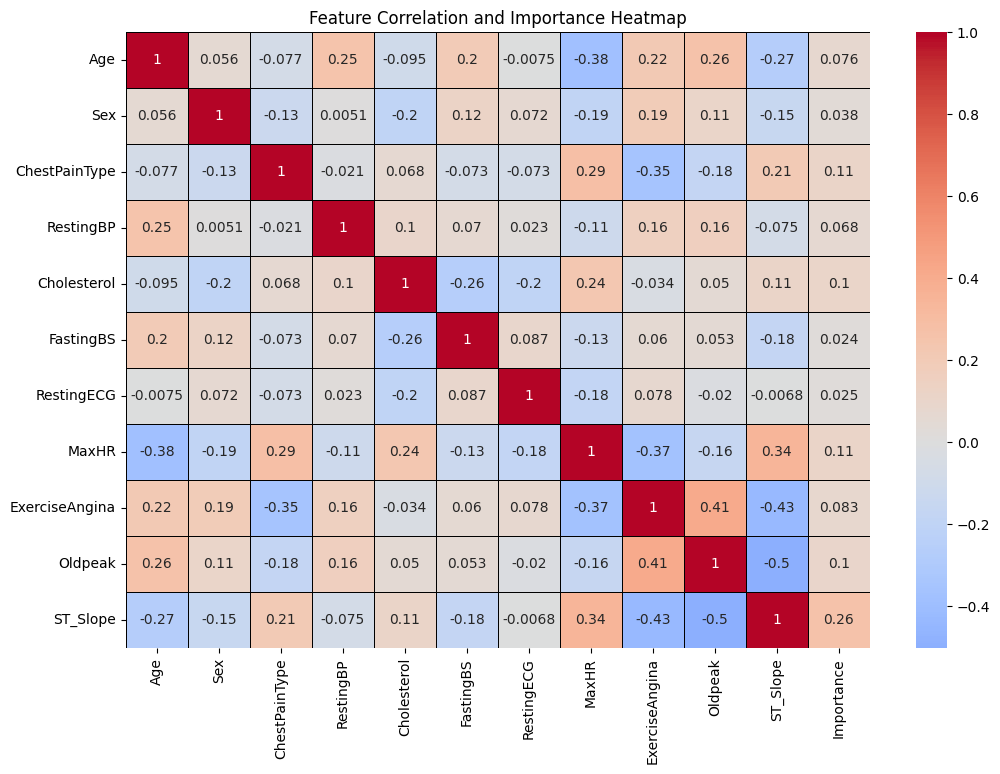

In [8]:
label_encoder = LabelEncoder()
data["Sex"] = label_encoder.fit_transform(data["Sex"])
data["ChestPainType"] = label_encoder.fit_transform(data["ChestPainType"])
data["RestingECG"] = label_encoder.fit_transform(data["RestingECG"])
data["ExerciseAngina"] = label_encoder.fit_transform(data["ExerciseAngina"])
data["ST_Slope"] = label_encoder.fit_transform(data["ST_Slope"])
X = data.drop("HeartDisease", axis=1)
Y = data["HeartDisease"]
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X,Y)
feature_importances = rf_classifier.feature_importances_
feature_importances_df = pd.DataFrame({'Feature': X.columns, 'Importances':feature_importances})
feature_importances_df = feature_importances_df.sort_values(by="Importances", ascending=False)
print("Ranked list of features by importances:")
print(feature_importances_df)
corr_matrix = X.corr()
importances_matrix = pd.DataFrame(corr_matrix)
importances_matrix['Importance'] = feature_importances
min_value = min(importances_matrix.values.min(), corr_matrix.values.min())
max_value = max(importances_matrix.values.max(), corr_matrix.values.max())
plt.figure(figsize=(12,8))
sns.heatmap(importances_matrix, annot=True, cmap='coolwarm', vmin=min_value, vmax=max_value, center=0, linewidths=0.5, linecolor="black")
plt.title("Feature Correlation and Importance Heatmap")
plt.show()